In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

11168
/media/work/docs/codes/QuCF/scripts-py


In [6]:
import pylib.mix as mix

path_ = "../results/KIN1D1D-results/"
fname = path_ + "tiny/out_3_2_w1.2_Lx100_Lv4_flat.hdf5"
# fname = path_ + "out_3_3_w1.2_Lx100_Lv4_flat.hdf5"
# fname = path_ + "out_7_5_w1.2_Lx100_Lv4_flat.hdf5"

In [27]:
# ------------------------------------------------------
# --- For plotting matrices ---
# ------------------------------------------------------
from matplotlib import ticker

cmap = 'seismic'
cmap = 'bwr'
# cmap = 'bwr'
# cmap = 'jet'
# cmap = 'coolwarm'
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


def plot_matrix(B, name):
    print("--- Plotting {:s} matrix ---".format(name))
    fontsize = 20
    
    Br_max = np.max(np.max( np.abs(B.real) ))
    Bi_max = np.max(np.max( np.abs(B.imag) ))

    print(name + "_real_max = {:0.3e}".format(Br_max))
    print(name + "_imag_max = {:0.3e}".format(Bi_max))

    # ------------------------------------------------------------------------------
    # --- Real part ---
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    cs = ax.matshow(B.real, cmap=cmap, vmin=-Br_max, vmax = Br_max)
    plt.xlabel('columns', fontsize = fontsize)
    plt.ylabel("rows", fontsize = fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    cbar1 = fig1.colorbar(cs, ax = ax)
#     cbar1.set_label(label='matrix values',size=fontsize,weight='bold')
    cbar1.ax.tick_params(labelsize=fontsize)
    
    ax.axvline(x = Nx*Nv-0.5, color = 'black', linewidth = 1, linestyle = "-")
    ax.axhline(y = Nx*Nv-0.5, color = 'black', linewidth = 1, linestyle = "-")
    
#     ax.text(50,  10, r'$\textbf{F}$', fontsize=fontsize)
#     ax.text(110, 10, r'$\textbf{C}^E$', fontsize=fontsize)
#     ax.text(50, 74, r'$\textbf{C}^f$', fontsize=fontsize)
#     ax.text(110, 74, r'$\textbf{S}$', fontsize=fontsize)

#     for ii in range(1, Nx):
#         ax.axvline(x = ii*Nv-0.5, ymin = 0.5, ymax = 1.0, color = 'gray', linewidth = 1, linestyle = "--")
#         ax.axhline(
#             y = ii*Nv-0.5, 
#             xmin = 0.0, xmax = 0.5, 
#             color = 'gray', linewidth = 1, linestyle = "--"
#         )
        
#     for ii in range(1, Nx):
#         ax.axvline(
#             x = Nx*Nv + ii*Nv-0.5, 
#             ymin = 0.5, ymax = 1.0, 
#             color = 'gray', linewidth = 1, linestyle = "--"
#         )
#         ax.axhline(
#             y = ii*Nv-0.5, 
#             xmin = 0.5, xmax = 1.0, 
#             color = 'gray', linewidth = 1, linestyle = "--"
#         )

#     for ii in range(1, Nx):
#         ax.axvline(x = ii*Nv-0.5, ymin = 0.0, ymax = 0.5, color = 'gray', linewidth = 1, linestyle = "--")
#         ax.axhline(
#             y = Nx*Nv + ii*Nv-0.5, 
#             xmin = 0.0, xmax = 0.5, 
#             color = 'gray', linewidth = 1, linestyle = "--"
#         )
        
    # ------------------------------------------------------------------------------
    # --- Imaginary part ---
    fig2 = plt.figure()
    ax = fig2.add_subplot(111)
    cs = ax.matshow(B.imag, cmap=cmap, vmin=-Bi_max, vmax = Bi_max)
    plt.xlabel("columns", fontsize = fontsize)
    plt.ylabel("rows", fontsize = fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    cbar2 = fig2.colorbar(cs, ax = ax)
    cbar2.ax.tick_params(labelsize=fontsize)
    
    ax.axvline(x = Nx*Nv-0.5, color = 'black', linewidth = 1, linestyle = "-")
    ax.axhline(y = Nx*Nv-0.5, color = 'black', linewidth = 1, linestyle = "-")
    
#     ax.text(26,  6, r'$\hat{F}$', fontsize=fontsize)
#     ax.text(56,  6, r'$\hat{C}^E$', fontsize=fontsize)
#     ax.text(24, 38, r'$\hat{C}^f$', fontsize=fontsize)
#     ax.text(58, 38, r'$\hat{S}$', fontsize=fontsize)
    
#     for ii in range(1, Nx):
#         ax.axvline(x = ii*Nv-0.5, ymin = 0.0, ymax = 0.5, color = 'gray', linewidth = 1, linestyle = "--")
#         ax.axhline(
#             y = Nx*Nv + ii*Nv-0.5, 
#             xmin = 0.0, xmax = 0.5, 
#             color = 'gray', linewidth = 1, linestyle = "--"
#         )
    
    return fig1, fig2





def plot_matrix_r(B, name):
    print("--- Plotting {:s} matrix ---".format(name))
    fontsize = 20
    
    Br_max = np.max(np.max( np.abs(B.real) ))
    Bi_max = np.max(np.max( np.abs(B.imag) ))

    print(name + "_real_max = {:0.3e}".format(Br_max))
    print(name + "_imag_max = {:0.3e}".format(Bi_max))

    # ------------------------------------------------------------------------------
    # --- Real part ---
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    cs = ax.matshow(B.real, cmap=cmap, vmin=-Br_max, vmax = Br_max)
    plt.xlabel('columns', fontsize = fontsize)
    plt.ylabel("rows", fontsize = fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    
    return 

In [22]:
# ------------------------------------------------------
# --- Read the matrices ---
# ------------------------------------------------------
with h5py.File(fname, "r") as f:
    bg = f["grids"]
    x = np.array(bg["x"])
    v = np.array(bg["v"])
    Nx = len(x)
    Nv = len(v)
    
def read_matrix(name):
    print("read the matrix " + name)
    ddA = {}
    with h5py.File(fname, "r") as f:
        # ---
        bg           = f["basic"]
        date_sim    = bg["date-of-simulation"][()].decode("utf-8")
        #---
        bg = f["matrices"]
        ddA["N"] = bg[name + "-N"][()]
        ddA["Nnz"] = bg[name + "-Nnz"][()]
        ddA["columns"] = bg[name + "-columns"][()]
        ddA["rows"]    = bg[name + "-rows"][()]
        temp_array = bg[name + "-values"][()]
        
    print("date of the simulation: ", date_sim)
        
    ddA["values"] = np.zeros(ddA["Nnz"], dtype=complex)
    for ii in range(len(temp_array)):
        v = temp_array[ii]
        ddA["values"][ii] = complex(v[0], v[1])
    return ddA

def form_matrix(ddA):
    N = ddA["N"]
    print("N = {:d}".format(N))
    A = np.zeros((N,N), dtype=complex)
    for ir in range(N):
        for i_nz in range(ddA["rows"][ir], ddA["rows"][ir+1]):
#             print(ddA["values"][i_nz])
            A[ir][ddA["columns"][i_nz]] = ddA["values"][i_nz]
    return A

def form_mask(dd):
    N = dd["N"]
    print("N = {:d}".format(N))
    A = np.zeros((N,N), dtype=complex)
    for ir in range(N):
        for i_nz in range(dd["rows"][ir], dd["rows"][ir+1]):
            if(np.abs(dd["values"][i_nz]) > 0):
                A[ir][dd["columns"][i_nz]] = 1
    A_cc = np.transpose(A)
    return A, A_cc

In [23]:
# --- Reading data --
print(f"Reading the file {fname}...")

ddA = read_matrix("A")
A = form_matrix(ddA)
A_mask, A_mask_cc = form_mask(ddA)

# ddAG = read_matrix("AG")
# AG = form_matrix(ddAG)

# ddAS = read_matrix("AS")
# AS = form_matrix(ddAS)

Reading the file ../results/KIN1D1D-results/tiny/out_3_2_w1.2_Lx100_Lv4_flat.hdf5...
read the matrix A
date of the simulation:  05-05-2023 16:09:34
N = 64
N = 64


--- Plotting A matrix ---
A_real_max = 1.000e+00
A_imag_max = 0.000e+00


<IPython.core.display.Javascript object>


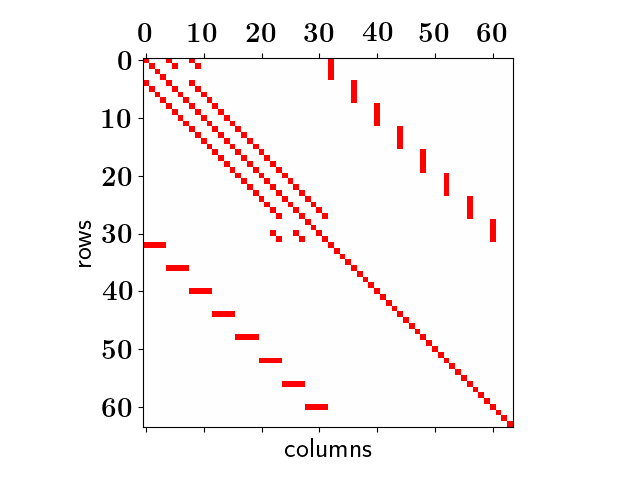

--- Plotting Acc matrix ---
Acc_real_max = 1.000e+00
Acc_imag_max = 0.000e+00


<IPython.core.display.Javascript object>


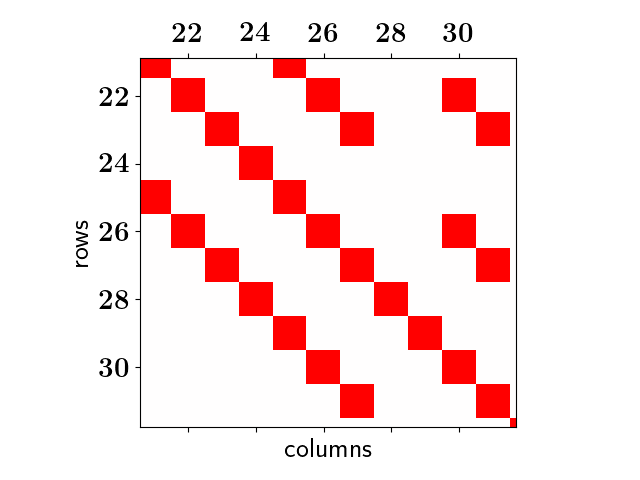

In [28]:
# ------------------------------------------------------
# --- Plot the matrix A ---
# ------------------------------------------------------

plot_matrix_r(A_mask, "A")
plot_matrix_r(A_mask_cc, "Acc")



# figA_real, figA_imag = plot_matrix(A, "A")
# figA_real.savefig(path_ + "/A-real-matrix-with-copies.eps")
# figA_imag.savefig(path_ + "/A-imag-matrix-with-copies.eps")

In [12]:
# --------------------------------------------------------
# --- Find AG^{-1} and the condition number of AG^{-1}A ---
# --------------------------------------------------------
import time

print("Nx, Nv: {:d}, {:d}".format(Nx, Nv))

print("--------------------------------------------")
print("--- Condition number of A ---")
start = time.perf_counter()
_, s, _ = np.linalg.svd(A)
kappa = np.max(np.abs(s)) / np.min(np.abs(s[np.nonzero(s)]))
print("\tcondition number of A: \t\t{:0.3e}".format(kappa))
end   = time.perf_counter()
print("elapsed time: {:0.3e} s".format(end - start))
del s, kappa

Nx, Nv: 128, 32
--------------------------------------------
--- Condition number of A ---
	condition number of A: 		3.489e+04
elapsed time: 2.287e+02 s


In [13]:
np.log2(3.489e+04)

15.090525977081738

In [ ]:
# --------------------------------------------------------
# --- Condition numbers ---
# flat profiles, wa = 1.222
# --------------------------------------------------------
mix.reload_module(mix)

# # --- for coef = 0.1 ---
# nv = 4
# nx        = [        4,         5,         6,         7,         8]
# kappa_A   = [4.658e+02, 2.738e+03, 1.587e+03, 9.283e+03, 1.530e+04]
# kappa_AG  = [6.963e+01, 1.612e+02, 3.028e+02, 6.549e+02, 1.467e+03]
# kappa_AS  = [1.413e+03, 1.413e+03, 1.413e+03, 1.413e+03, 1.413e+03] 
# kappa_AGA = []

# mix.save_dat_plot_1d_file(path_ + "/kappa_nv4_a01.dat", nx, kappa_A)
# del nv, nx, kappa_A, kappa_AG, kappa_AS, kappa_AGA

# --- for coef = 1.0 ---
nv = 4
nx        = [        4,         5,         6,         7,         8]
kappa_A   = [4.658e+02, 2.738e+03, 1.587e+03, 9.283e+03, 1.530e+04]
kappa_AG  = [9.795e+00, 2.332e+01, 5.968e+01, 1.597e+02, 4.384e+02]
kappa_AS  = [2.220e+01, 2.220e+01, 2.220e+01, 2.220e+01, 2.220e+01] 
kappa_AGA = [3.634e+02, 1.638e+03, 5.112e+02, 1.329e+03, 1.111e+03]

log_kappa_A   = np.log2(kappa_A)
log_kappa_AG  = np.log2(kappa_AG)
log_kappa_AS  = np.log2(kappa_AS)
log_kappa_AGA = np.log2(kappa_AGA)

mix.save_dat_plot_1d_file(path_ + "/kappa_nv4_a1_A.dat", nx, log_kappa_A)
mix.save_dat_plot_1d_file(path_ + "/kappa_nv4_a1_AG.dat", nx, log_kappa_AG)
mix.save_dat_plot_1d_file(path_ + "/kappa_nv4_a1_AS.dat", nx, log_kappa_AS)
mix.save_dat_plot_1d_file(path_ + "/kappa_nv4_a1_AGA.dat", nx, log_kappa_AGA)



# # --- for coef = 1.0 ---
# nv = 5
# nx        = [        5,         6,         7]
# kappa_A   = [2.413e+03, 2.643e+04, 6.506e+03]
# kappa_AG  = [1.156e+01, 2.837e+01, 7.393e+01]
# kappa_AS  = [3.165e+01, 3.165e+01, 3.165e+01] 
# kappa_AGA = [2.527e+03, 3.049e+04, 5.947e+03]
# del nv, nx, kappa_A, kappa_AG, kappa_AS, kappa_AGA